In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
books=pd.read_csv('/content/books.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip')
ratings=pd.read_csv('/content/ratings.csv', sep=';', encoding='latin-1')
users=pd.read_csv('/content/users.csv', sep=';', encoding='latin-1')

In [ ]:
with open('/content/books.csv', 'r', encoding='latin-1') as f:
    for i, line in enumerate(f):
        if i == 6451: # Line numbers are 0-indexed, so line 6452 is index 6451
            print(f"Problematic line (line 6452): {line}")
            break

Problematic line (line 6452): "0735201994";"Peterman Rides Again: Adventures Continue with the Real \"J. Peterman\" Through Life &amp; the Catalog Business";"John Peterman";"2000";"Prentice Hall Art";"http://images.amazon.com/images/P/0735201994.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0735201994.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0735201994.01.LZZZZZZZ.jpg"



In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [ ]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [ ]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [ ]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [ ]:
books.duplicated().sum()

np.int64(0)

In [ ]:
users.duplicated().sum()

np.int64(0)

In [ ]:
ratings.duplicated().sum()

np.int64(0)

In [ ]:
df=pd.DataFrame(ratings)

In [ ]:
# Check missing values
print("\nMissing values per dataset:")
print("Books:\n", books.isnull().sum())
print("Ratings:\n", ratings.isnull().sum())
print("Users:\n", users.isnull().sum())

# Convert rating to numeric (important)
ratings["Book-Rating"] = pd.to_numeric(ratings["Book-Rating"], errors="coerce")



Missing values per dataset:
Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Users:
 User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
print("Unique users:", ratings["User-ID"].nunique())
print("Unique books:", ratings["ISBN"].nunique())
print("Total ratings:", len(ratings))

print("Rating value counts:")
print(ratings["Book-Rating"].value_counts().sort_index())


Unique users: 105283
Unique books: 340556
Total ratings: 1149780
Rating value counts:
Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64


In [ ]:
book_stats = (
    ratings.groupby("ISBN")["Book-Rating"]
    .agg(["count", "mean", "median", "std"])
    .reset_index()
    .sort_values("count", ascending=False)
)

In [ ]:
print("\nTop 10 most rated books:")
print(book_stats.head(10))

# Save results
book_stats.head(100).to_csv("top_books_by_count.csv", index=False)
book_stats[book_stats["count"] >= 5].sort_values("mean", ascending=False).head(100).to_csv(
    "top_books_by_mean_at_least_5_ratings.csv", index=False
)


Top 10 most rated books:
              ISBN  count      mean  median       std
247408  0971880107   2502  1.019584     0.0  2.179843
47371   0316666343   1295  4.468726     6.0  4.230463
83359   0385504209    883  4.652322     6.0  4.376585
9637    0060928336    732  3.448087     0.0  4.061266
41007   0312195516    723  4.334716     5.0  4.268839
101670  044023722X    647  3.187017     0.0  3.825200
166705  0679781587    639  4.381847     5.0  4.349689
28153   0142001740    615  4.219512     0.0  4.358407
166434  067976402X    614  3.255700     0.0  4.037519
153620  0671027360    586  3.718430     0.0  4.182696


In [ ]:
user_stats = (
    ratings.groupby("User-ID")["Book-Rating"]
    .agg(["count", "mean"])
    .reset_index()
    .sort_values("count", ascending=False)
)

print("\nTop 10 most active users:")
print(user_stats.head(10))

user_stats.head(100).to_csv("top_users_by_rating_count.csv", index=False)



Top 10 most active users:
        User-ID  count      mean
4213      11676  13602  4.564917
74815    198711   7550  0.016291
58113    153662   6109  2.786872
37356     98391   5891  8.728230
13576     35859   5850  1.075897
80185    212898   4785  0.003135
105111   278418   4533  0.159276
28884     76352   3367  0.145233
42037    110973   3100  0.787742
88584    235105   3067  2.671992


In [ ]:
merged = ratings.merge(books, on="ISBN", how="left")
print("\nMerged shape:", merged.shape)
print(merged.head(3))

# Save sample
merged.head(200).to_csv("merged_sample_head200.csv", index=False)



Merged shape: (1149780, 10)
   User-ID        ISBN  Book-Rating            Book-Title      Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel       M. J. Rose   
1   276726  0155061224            5      Rites of Passage       Judith Rae   
2   276727  0446520802            0          The Notebook  Nicholas Sparks   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2001            Heinle   
2                1996      Warner Books   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   

                                   

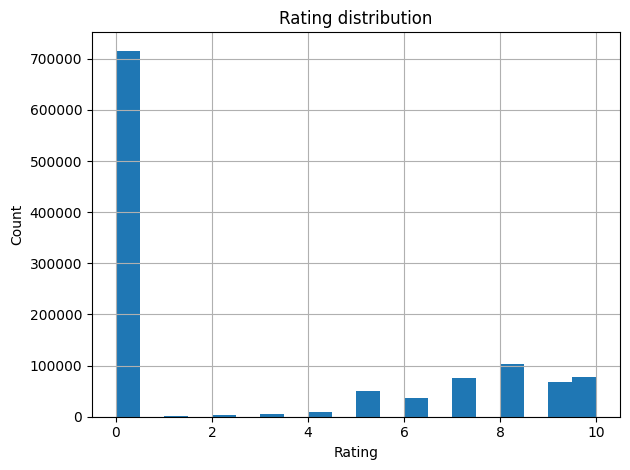

In [ ]:
# Rating distribution
plt.figure()
ratings["Book-Rating"].hist(bins=20)
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("rating_distribution.png")
plt.show()

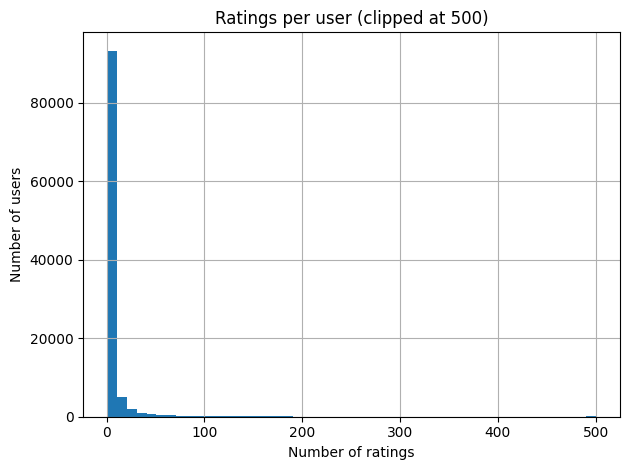

In [ ]:
# Ratings per user
plt.figure()
user_stats["count"].clip(upper=500).hist(bins=50)
plt.title("Ratings per user (clipped at 500)")
plt.xlabel("Number of ratings")
plt.ylabel("Number of users")
plt.tight_layout()
plt.savefig("ratings_per_user_hist.png")
plt.show()

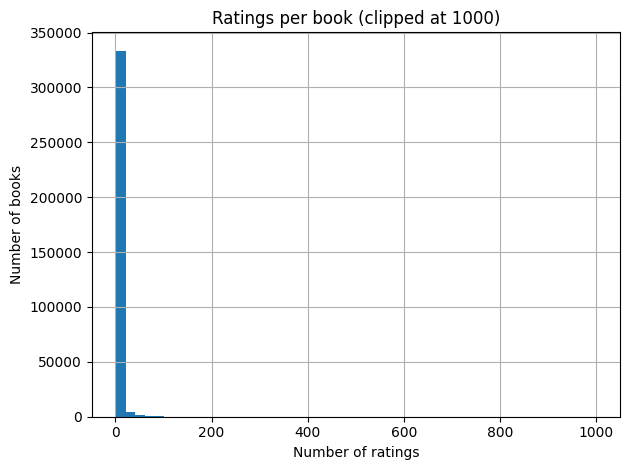

In [ ]:
# Ratings per book
plt.figure()
book_stats["count"].clip(upper=1000).hist(bins=50)
plt.title("Ratings per book (clipped at 1000)")
plt.xlabel("Number of ratings")
plt.ylabel("Number of books")
plt.tight_layout()
plt.savefig("ratings_per_book_hist.png")
plt.show()

#Popularity Based Recommender System

In [ ]:
ratings_with_name=ratings.merge(books,on='ISBN')

In [ ]:
num_rating_df=ratings_with_name.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [ ]:
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')
ratings_with_name.dropna(subset=['Book-Rating'], inplace=True)
avg_rating_df=ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [ ]:
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,http://images.amazon.com/images/P/0590567330.0...,4,2.250000
1,Always Have Popsicles,Rebecca Harvin,http://images.amazon.com/images/P/0964147726.0...,1,0.000000
2,Apple Magic (The Collector's series),Martina Boudreau,http://images.amazon.com/images/P/0942320093.0...,1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,http://images.amazon.com/images/P/0310232546.0...,1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,http://images.amazon.com/images/P/0962295701.0...,1,0.000000
...,...,...,...,...,...
270291,Ã?Â?lpiraten.,Janwillem van de Wetering,http://images.amazon.com/images/P/3499232499.0...,2,0.000000
270292,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,http://images.amazon.com/images/P/325721538X.0...,4,5.250000
270293,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,http://images.amazon.com/images/P/3451274973.0...,1,7.000000
270294,Ã?Â?stlich der Berge.,David Guterson,http://images.amazon.com/images/P/3442725739.0...,3,2.666667


#Collaborative Filtering Based Recommender System

In [ ]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200

In [ ]:
users_rated=x[x].index

In [ ]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(users_rated)]

In [ ]:
y=filtered_rating.groupby('Book-Title')['Book-Rating'].count()>=50

In [ ]:
famous_books=y[y].index

In [ ]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


In [ ]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores=cosine_similarity(pt)

In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [ ]:
recommend('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [ ]:
pt.index[545]

"The Handmaid's Tale"

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [ ]:
import pickle

# Load the saved files
popular_df = pickle.load(open('popular.pkl', 'rb'))
pt = pickle.load(open('pt.pkl', 'rb'))
books = pickle.load(open('books.pkl', 'rb'))
similarity_scores = pickle.load(open('similarity_scores.pkl', 'rb'))

In [ ]:
pt


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now you can use the `recommend` function with a book title to get recommendations. Remember that the `recommend` function was defined in a previous cell, so make sure that cell has been executed.

In [ ]:
from google.colab import files

files.download('pt.pkl')
files.download('similarity_scores.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Example usage of the recommend function
recommendations = recommend('The Da Vinci Code')

# Display the recommendations
for book in recommendations:
    print(f"Title: {book[0]}")
    print(f"Author: {book[1]}")
    print(f"Image URL: {book[2]}")
    print("-" * 20)

Title: Angels &amp; Demons
Author: Dan Brown
Image URL: http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg
--------------------
Title: Touching Evil
Author: Kay Hooper
Image URL: http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg
--------------------
Title: Saving Faith
Author: David Baldacci
Image URL: http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg
--------------------
Title: The Sweet Potato Queens' Book of Love
Author: JILL CONNER BROWNE
Image URL: http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg
--------------------


In [ ]:
popular_df = pickle.load(open('popular.pkl','rb'))
print(popular_df.columns.tolist())


['Book-Title', 'num_ratings', 'avg_ratings']
